In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import grid_search
from sklearn import svm
import scipy.stats 
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Convert the data to Data Frame

## Read data and build table.

In [4]:
data_all

MSN,AFGVBUS,ARICBUS,ARICPUS,ARNFBUS,ARNFPUS,ARTCBUS,ARTCPUS,AVACBUS,AVACEUS,AVACPUS,...,ZWHDPC1,ZWHDPC2,ZWHDPC3,ZWHDPC4,ZWHDPC5,ZWHDPC6,ZWHDPC7,ZWHDPC8,ZWHDPC9,ZWHDPUS
YYYYMM,,,,,,,,,,,,,,,,,,,,,
194913,NaN,379.500,156.679,NaN,NaN,379.500,156.679,171.592,NaN,93.129,...,6149.0,5610.0,6169.0,6770.0,3133.0,3154.0,2383.0,6804.0,4256.0,4938.0
195013,NaN,435.149,179.655,NaN,NaN,435.149,179.655,199.482,NaN,108.266,...,6794.0,6324.0,7027.0,7455.0,3521.0,3547.0,2277.0,6341.0,3906.0,5367.0
195113,NaN,479.610,198.011,NaN,NaN,479.610,198.011,267.297,NaN,145.071,...,6476.0,6031.0,6944.0,7567.0,3521.0,3571.0,2431.0,6860.0,4027.0,5315.0
195213,NaN,517.303,212.989,NaN,NaN,517.303,212.989,312.961,NaN,169.391,...,6501.0,5974.0,6366.0,6713.0,3450.0,3493.0,2340.0,6588.0,4119.0,5085.0
195313,NaN,523.036,215.940,NaN,NaN,523.036,215.940,356.954,NaN,193.732,...,5946.0,5516.0,6006.0,6288.0,3197.0,3320.0,2242.0,6024.0,3810.0,4749.0
195413,NaN,556.050,229.570,NaN,NaN,556.050,229.570,327.958,NaN,177.995,...,6587.0,5992.0,6224.0,6356.0,3424.0,3395.0,2099.0,5822.0,3879.0,4964.0
195513,NaN,614.772,253.814,NaN,NaN,614.772,253.814,354.072,NaN,192.167,...,6872.0,6231.0,6486.0,6912.0,3508.0,3513.0,2294.0,6704.0,4320.0,5246.0
195613,NaN,659.837,271.675,NaN,NaN,659.837,271.675,376.596,NaN,203.833,...,7009.0,6294.0,6420.0,6692.0,3309.0,3306.0,2236.0,6261.0,3983.0,5128.0
195713,NaN,637.693,263.277,NaN,NaN,637.693,263.277,370.604,NaN,201.140,...,6444.0,5967.0,6553.0,6844.0,3231.0,3308.0,2281.0,6339.0,3877.0,5047.0


In [60]:
data_raw = pd.read_csv('data/data.csv')
data_raw['Value'] = pd.to_numeric(data_raw['Value'], errors='coerce')
# data indexed by month
data_all = data_raw.pivot_table(index='YYYYMM',columns='MSN',values='Value')
# columns description
desc = data_raw.groupby('MSN')['Description'].first()
# exclude unlabeled data
data = data_all[data_all['CODPUUS'].notnull()]
# exclude months with to much missing data
data = data.iloc[22:-3]
# remove total (month 13)
data = data[data.index.isin([str(year) + '13' for year in range(1900,2019)]) == False]
# exclude columns with missing data
data = data.dropna(axis=1)

/home/gabriel/bin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Separete data between target/feature and train/test.

In [5]:
desc['CODPUUS']

'Crude Oil Domestic First Purchase Price'

In [6]:
test = data[::10] # aproximately 10% for tests
train = data.loc[data.index.difference(test.index).tolist()]
y = train['CODPUUS']
x = train.drop('CODPUUS', axis=1)
y_tst = test['CODPUUS']
x_tst = test.drop('CODPUUS', axis=1)

## data for cross validation

In [7]:
rkf = RepeatedKFold(n_splits=2, n_repeats=5)
cross_val = list(rkf.split(x,y))
cv_errors = pd.DataFrame()

# Linear Model

In [29]:
model = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [30]:
y_pred = model.predict(x_tst)
sk.metrics.mean_squared_error(y_tst, y_pred)

10.808532132186498

## The cross validation data

In [31]:
cv_errors_par = np.zeros(10)
i = 0
for train_idxs, val_idxs in cross_val:
    model.fit(x.iloc[train_idxs],y.iloc[train_idxs])
    y_pred = model.predict(x.iloc[val_idxs])
    cv_errors_par[i] = sk.metrics.mean_squared_error(y.iloc[val_idxs], y_pred)
    i += 1
cv_errors['linear'] = cv_errors_par

## Applying Regularization

### Grid search to find the constant to regularization

In [11]:
model = linear_model.Ridge(alpha=0.1,fit_intercept=True, normalize=True, copy_X=True)
param_grid1 = {'alpha': (10 ** np.arange(-10,11,dtype=np.float))}
param_grid2 = {'alpha': 0.00001 * np.arange(1,100,dtype=np.float)}
search1 = grid_search.GridSearchCV(model, param_grid1, 'neg_mean_squared_error', cv=5)
search2 = grid_search.GridSearchCV(model, param_grid2, 'neg_mean_squared_error', cv=5)
search1.fit(x,y)
search2.fit(x,y)
search2.best_params_

{'alpha': 3.0000000000000004e-05}

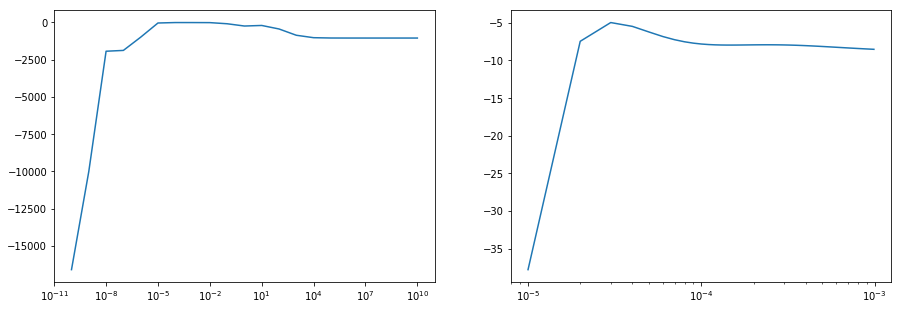

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.semilogx(10 ** np.arange(-10,11,dtype=np.float), pd.DataFrame(search1.grid_scores_)['mean_validation_score'])
ax2.semilogx(0.00001 * np.arange(1,100,dtype=np.float), pd.DataFrame(search2.grid_scores_)['mean_validation_score'])

### Model with the selected constant

In [13]:
model = linear_model.Ridge(alpha=3e-5,fit_intercept=True, normalize=True, copy_X=True)
model.fit(x,y)

Ridge(alpha=3e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [14]:
y_pred = model.predict(x_tst)
sk.metrics.mean_squared_error(y_tst, y_pred)

0.3138478990128234

### The cross validation data

In [35]:
cv_errors_par = np.zeros(10)
i = 0
for train_idxs, val_idxs in cross_val:
    model.fit(x.iloc[train_idxs],y.iloc[train_idxs])
    y_pred = model.predict(x.iloc[val_idxs])
    cv_errors_par[i] = sk.metrics.mean_squared_error(y.iloc[val_idxs], y_pred)
    i += 1
cv_errors['linear regularization'] = cv_errors_par

# polymomial Model

## Grid search to find the constant to regularization

In [17]:
poly_x = preprocessing.PolynomialFeatures(2).fit_transform(x)
model = linear_model.Ridge(alpha=0.1,fit_intercept=True, normalize=True, copy_X=True)
#param_grid = {'alpha': (10 ** np.arange(-10,11,dtype=np.float))}
param_grid = {'alpha': (0.1 * np.arange(1,100,dtype=np.float))}
search = grid_search.GridSearchCV(model, param_grid, 'neg_mean_squared_error', cv=5)
search.fit(poly_x,y)
search.best_params_

{'alpha': 2.0}

## The selected polynomial model

In [18]:
model = make_pipeline(preprocessing.PolynomialFeatures(2), linear_model.Ridge(alpha=2,fit_intercept=True, normalize=True, copy_X=True))
model.fit(x,y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001))])

In [19]:
y_pred = model.predict(x_tst)
sk.metrics.mean_squared_error(y_tst, y_pred)

1.4089498929692013

## The cross validation data

In [20]:
cv_errors_par = np.zeros(10)
i = 0
for train_idxs, val_idxs in cross_val:
    model.fit(x.iloc[train_idxs],y.iloc[train_idxs])
    y_pred = model.predict(x.iloc[val_idxs])
    cv_errors_par[i] = sk.metrics.mean_squared_error(y.iloc[val_idxs], y_pred)
    i += 1
cv_errors['polynomial'] = cv_errors_par

# RVM 

## Griad search to find parameters

In [ ]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
model = svm.SVR(kernel='linear',max_iter=1000)
param_grid = {'C': 10 ** np.arange(-10,11,dtype=np.float),
             'epsilon': 10 ** np.arange(-10,11,dtype=np.float)}
             # 'kernel':['rbf','linear','poly']}
search = grid_search.GridSearchCV(model, param_grid, 'neg_mean_squared_error', cv=5)
search.fit(x_norm,y)
search.best_params_

## The selected RVM model

In [21]:
model = make_pipeline(StandardScaler(),svm.SVR(kernel='linear',C=10, epsilon=0.01))
model.fit(x,y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [22]:
y_pred = model.predict(x_tst)
sk.metrics.mean_squared_error(y_tst, y_pred)

0.3061632458058881

## The cross validation data

In [23]:
cv_errors_par = np.zeros(10)
i = 0
for train_idxs, val_idxs in cross_val:
    model.fit(x.iloc[train_idxs],y.iloc[train_idxs])
    y_pred = model.predict(x.iloc[val_idxs])
    cv_errors_par[i] = sk.metrics.mean_squared_error(y.iloc[val_idxs], y_pred)
    i += 1
cv_errors['rvm'] = cv_errors_par

# Random Florest

## Griad search to find parameters

In [24]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
model = RandomForestRegressor()
param_grid = {'n_estimators':np.arange(1,50)}
search = grid_search.GridSearchCV(model, param_grid, 'neg_mean_squared_error', cv=5)
search.fit(x_norm,y)
search.best_params_

{'n_estimators': 35}

## The selected Random Florest model

In [25]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=35))
model.fit(x,y)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [26]:
y_pred = model.predict(x_tst)
sk.metrics.mean_squared_error(y_tst, y_pred)

0.8394148987293052

## The cross validation data

In [36]:
cv_errors_par = np.zeros(10)
i = 0
for train_idxs, val_idxs in cross_val:
    model.fit(x.iloc[train_idxs],y.iloc[train_idxs])
    y_pred = model.predict(x.iloc[val_idxs])
    cv_errors_par[i] = sk.metrics.mean_squared_error(y.iloc[val_idxs], y_pred)
    i += 1
cv_errors['random florest'] = cv_errors_par

# Model Comparison

In [45]:
cv_errors

,linear,polynomial,rvm,linear regularization,random florest
0,1.838541,2.929500,0.898096,1.838541,1.838541
1,1.817066,2.092913,1.265187,1.817066,1.817066
2,3.691597,2.539658,1.455093,3.691597,3.691597
3,2.357342,2.079239,1.330051,2.357342,2.357342
4,1.646649,2.044756,1.040152,1.646649,1.646649
5,2.230222,2.098445,1.101463,2.230222,2.230222
6,2.451574,3.270527,1.312732,2.451574,2.451574
7,1.711937,1.791058,1.527096,1.711937,1.711937
8,2.205331,2.281808,1.508827,2.205331,2.205331
9,1.855101,2.126544,0.936807,1.855101,1.855101


In [51]:
scipy.stats.friedmanchisquare(cv_errors['linear'],cv_errors['linear regularization'],cv_errors['polynomial'],cv_errors['rvm'],cv_errors['random florest'])

FriedmanchisquareResult(statistic=27.40000000000002, pvalue=1.6499961568944697e-05)

In [58]:
scipy.stats.friedmanchisquare(cv_errors['linear'],cv_errors['linear regularization'],cv_errors['polynomial'],cv_errors['random florest'])

FriedmanchisquareResult(statistic=4.799999999999993, pvalue=0.18704174890490843)